In [ ]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos matematicos
from scipy.stats import trim_mean #estadistica
from statsmodels import robust
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [24]:
data=pd.read_csv('/content/SaratogaHouses.csv')
data.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


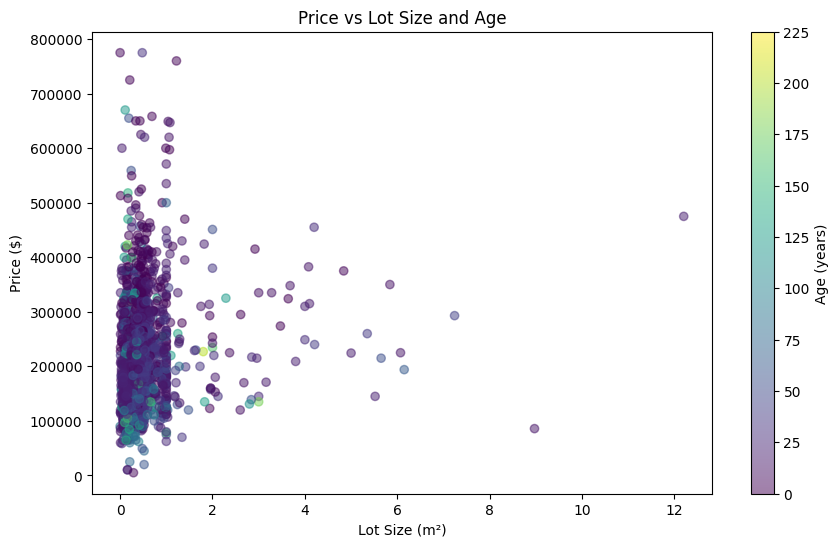

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['lotSize'], data['price'], c=data['age'], cmap='viridis', alpha=0.5)
plt.title('Price vs Lot Size and Age')
plt.xlabel('Lot Size (m²)')  # Asegúrate de que la unidad sea correcta
plt.ylabel('Price ($)')
_ = plt.colorbar(label='Age (years)')

plt.show()


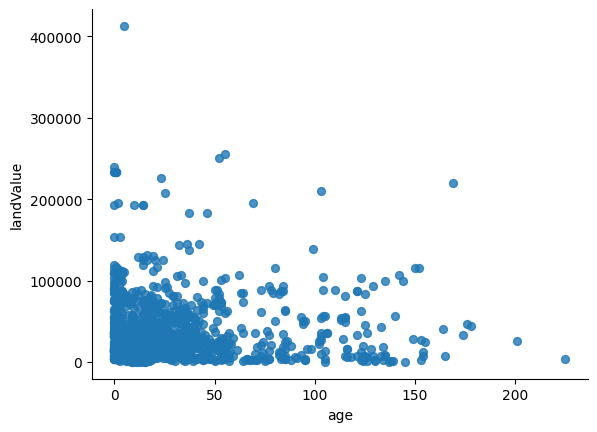

In [27]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='landValue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

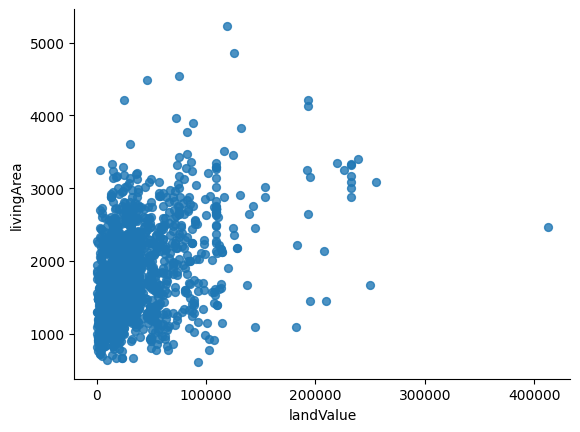

In [26]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='landValue', y='livingArea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

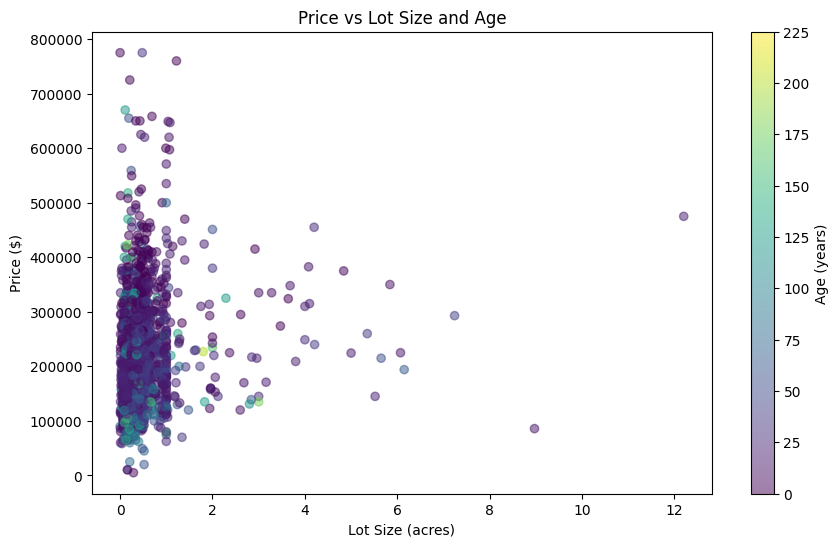

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['lotSize'], data['price'], c=data['age'], cmap='viridis', alpha=0.5)
plt.title('Price vs Lot Size and Age')
plt.xlabel('Lot Size (acres)')
plt.ylabel('Price ($)')
_ = plt.colorbar(label='Age (years)')

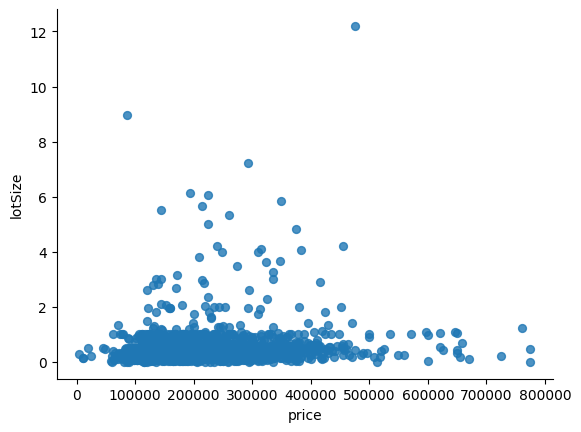

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='price', y='lotSize', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

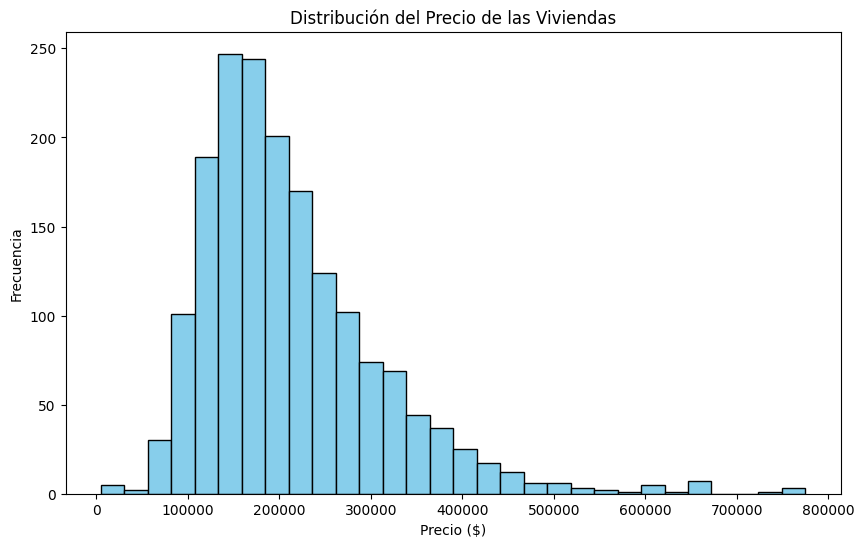

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Precio de las Viviendas')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

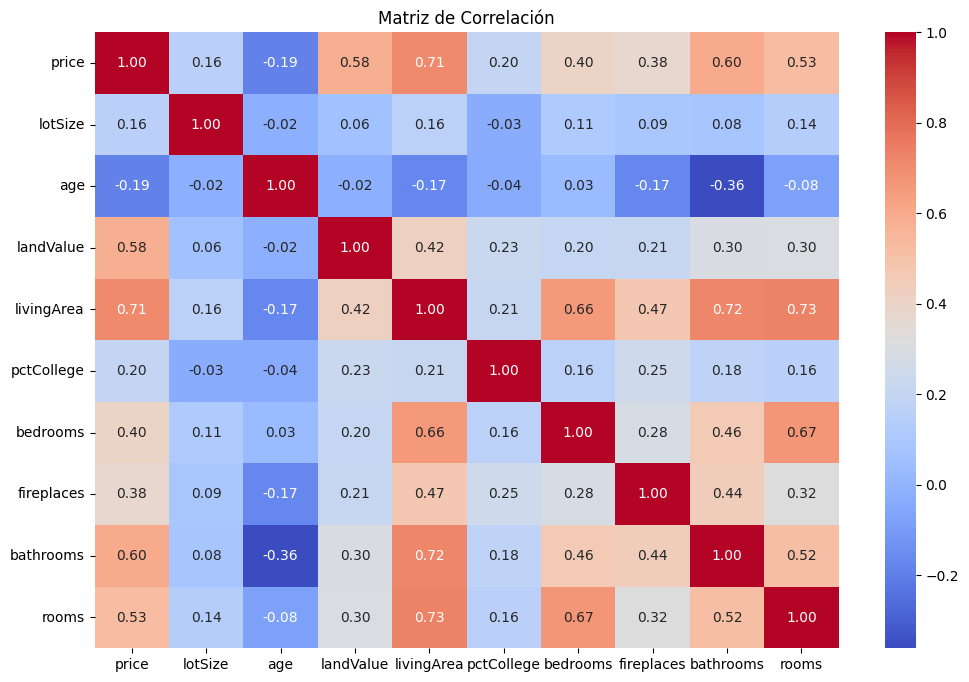

In [34]:
import seaborn as sns
import pandas as pd # Import pandas for data manipulation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Only include numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number']) # Select only numerical columns
corr = numerical_data.corr() # Calculate the correlation on numerical data
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carga el conjunto de datos
data = pd.read_csv("SaratogaHouses.csv")

# Selección de las características más relevantes para predecir el precio
features = ["livingArea", "bathrooms", "rooms", "landValue", "bedrooms"]
X = data[features]
y = data["price"]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo (error cuadrático medio)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Error cuadrático medio (RMSE): {rmse:.2f}")

# Función para hacer predicciones con el modelo entrenado
def predict_rent():
    # Solicita datos al usuario
    living_area = float(input("Ingrese el área habitable en metros cuadrados: "))
    bathrooms = float(input("Ingrese el número de baños: "))
    rooms = int(input("Ingrese el número total de habitaciones: "))
    land_value = float(input("Ingrese el valor del terreno: "))
    bedrooms = int(input("Ingrese el número de salas: "))

    # Crea el dataframe para la predicción
    new_data = pd.DataFrame({
        "livingArea": [living_area],
        "bathrooms": [bathrooms],
        "rooms": [rooms],
        "landValue": [land_value],
        "bedrooms": [bedrooms]
    })

    # Realiza la predicción
    predicted_price = model.predict(new_data)[0]
    print(f"El precio de alquiler aproximado es: ${predicted_price:.2f}")

# Llama a la función de predicción
predict_rent()


Error cuadrático medio (RMSE): 70140.43
Ingrese el área habitable en metros cuadrados: 100
Ingrese el número de baños: 4
Ingrese el número total de habitaciones: 5
Ingrese el valor del terreno: 1000000
Ingrese el número de dormitorios: 4
El precio de alquiler aproximado es: $1018876.11


In [ ]:
data.tail()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6,hot air,gas,septic,No,No,No


In [ ]:
data.sample()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1507,410000,0.79,11,86900,2444,75,4,1,3.0,11,hot air,gas,septic,No,No,No


In [ ]:
data.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [ ]:
file_path = '/content/SaratogaHouses.csv'
data = pd.read_csv(file_path)

In [ ]:
#encontrar valores perdidos
valores_perdidos=data.isnull().sum()
print(valores_perdidos)

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64


In [ ]:
#valores duplicados
duplicate_rows=data.duplicated().sum()
print(duplicate_rows)

7


In [ ]:
#eliminar datos duplicados
data_cleaned = data.drop_duplicates()
print(data_cleaned)

       price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
0     132500     0.09   42      50000         906          35         2   
1     181115     0.92    0      22300        1953          51         3   
2     109000     0.19  133       7300        1944          51         4   
3     155000     0.41   13      18700        1944          51         3   
4      86060     0.11    0      15000         840          51         2   
...      ...      ...  ...        ...         ...         ...       ...   
1723  289000     0.38   32      24200        2310          61         5   
1724  285000     0.94   37      36200        2564          61         4   
1725  194900     0.39    9      20400        1099          51         2   
1726  125000     0.24   48      16800        1225          51         3   
1727  111300     0.59   86      26000        1959          51         3   

      fireplaces  bathrooms  rooms          heating      fuel  \
0              1        1.0      5

In [ ]:
#identificacion de NaN
print(data.isna())

      price  lotSize    age  landValue  livingArea  pctCollege  bedrooms  \
0     False    False  False      False       False       False     False   
1     False    False  False      False       False       False     False   
2     False    False  False      False       False       False     False   
3     False    False  False      False       False       False     False   
4     False    False  False      False       False       False     False   
...     ...      ...    ...        ...         ...         ...       ...   
1723  False    False  False      False       False       False     False   
1724  False    False  False      False       False       False     False   
1725  False    False  False      False       False       False     False   
1726  False    False  False      False       False       False     False   
1727  False    False  False      False       False       False     False   

      fireplaces  bathrooms  rooms  heating   fuel  sewer  waterfront  \
0          Fal

In [ ]:
#valores infinitos
data.isin([np.inf, -np.inf]).sum()
print(data)

       price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
0     132500     0.09   42      50000         906          35         2   
1     181115     0.92    0      22300        1953          51         3   
2     109000     0.19  133       7300        1944          51         4   
3     155000     0.41   13      18700        1944          51         3   
4      86060     0.11    0      15000         840          51         2   
...      ...      ...  ...        ...         ...         ...       ...   
1723  289000     0.38   32      24200        2310          61         5   
1724  285000     0.94   37      36200        2564          61         4   
1725  194900     0.39    9      20400        1099          51         2   
1726  125000     0.24   48      16800        1225          51         3   
1727  111300     0.59   86      26000        1959          51         3   

      fireplaces  bathrooms  rooms          heating      fuel  \
0              1        1.0      5

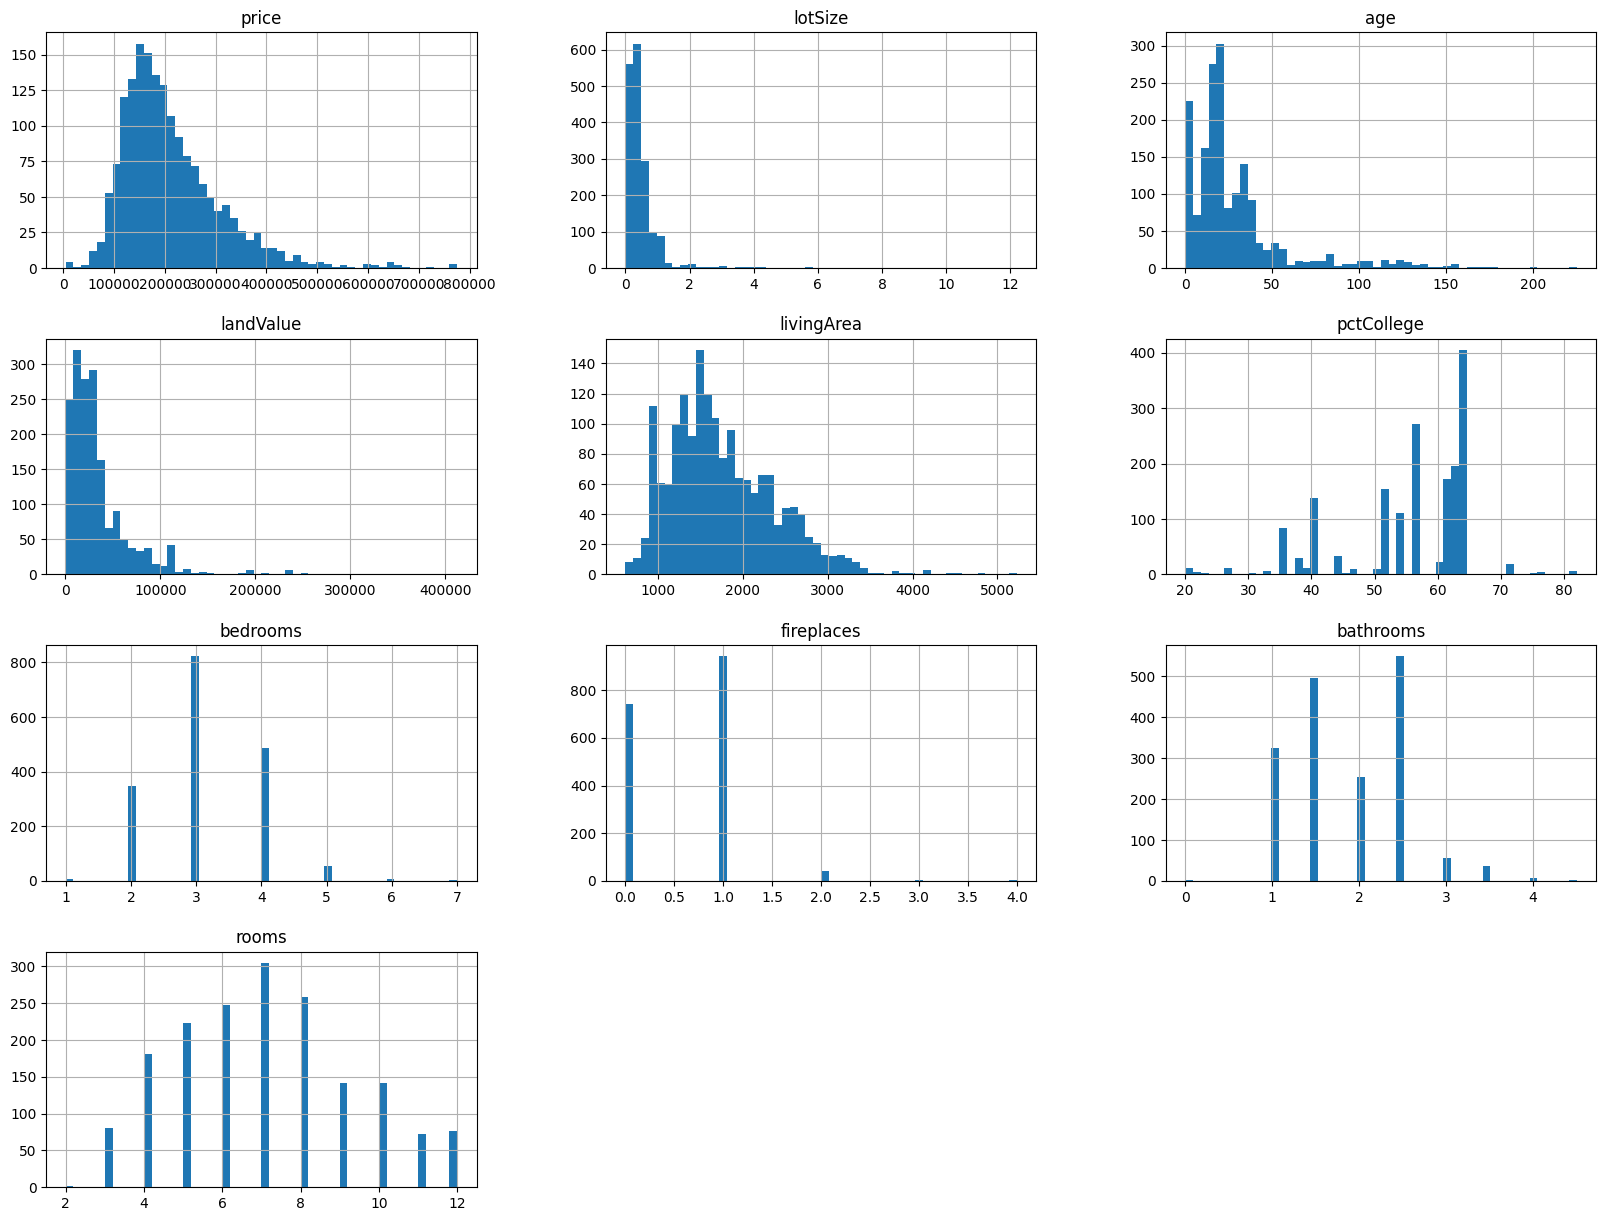

In [ ]:
#análisis gráfico
data.hist(bins=50, figsize=(20,15))
plt.show()